In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
from csv_utils import read_csv as present_from_vardges
df = present_from_vardges("data/SPECTF.dat") 
df.shape

test passed


(267, 45)

In [3]:
df[:2]

,f1,f10,f11,f12,f13,f14,f15,f16,f17,f18,...,f41,f42,f43,f44,f5,f6,f7,f8,f9,result
0,59,52,72,71,70,77,66,65,67,55,...,74,74,64,67,73,66,72,61,58,1
1,72,63,70,70,72,74,70,71,72,75,...,67,71,56,58,78,82,74,65,69,1


In [4]:
# depends on data
label = df.columns[df.columns == 'result'][0]
features = df.columns[df.columns != 'result']
label,features

('result',
 Index(['f1', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18',
        'f19', 'f2', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27',
        'f28', 'f29', 'f3', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36',
        'f37', 'f38', 'f39', 'f4', 'f40', 'f41', 'f42', 'f43', 'f44', 'f5',
        'f6', 'f7', 'f8', 'f9'],
       dtype='object'))

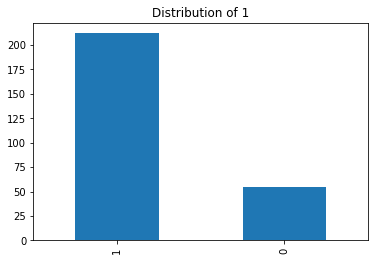

In [5]:
df[label].value_counts().plot(kind='bar')
plt.title("Distribution of 1")    

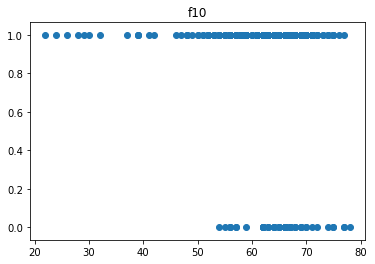

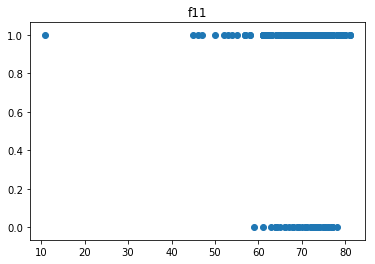

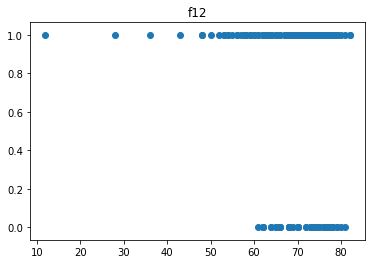

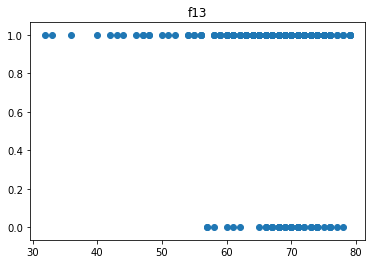

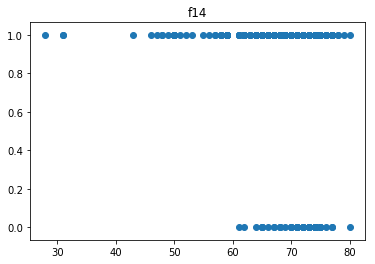

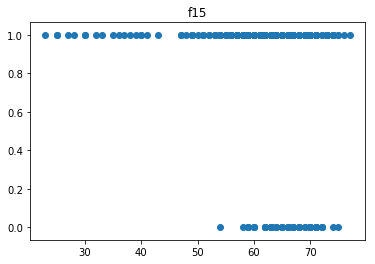

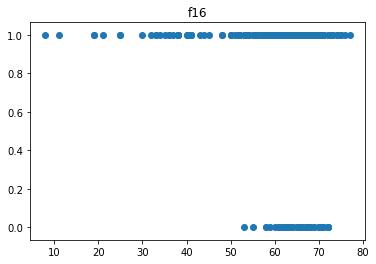

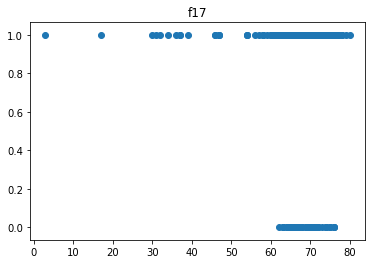

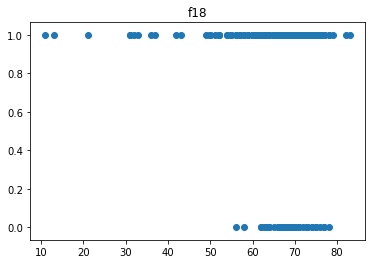

In [6]:
for i, feature in enumerate(df.columns[1:10]):
    plt.title(feature)
    plt.scatter(df.get(feature),df.get(label))
    plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression as LogisticRegression_sklearn
from logistic_regression import LogisticRegression
from random_forest import RandomForest
from sklearn.ensemble import RandomForestClassifier as RandomForest_sklearn

In [8]:
y = df[label].values.astype('float32')
X = df[features].values.astype('float32')

In [9]:
X.shape, y.shape

((267, 44), (267,))

In [10]:
def split_data(X, y, fraction=0.6):
    split_point = int(X.shape[0] * fraction)
    perm = np.random.permutation(X.shape[0])
    X = X[perm]
    y = y[perm]
    return X[:split_point], y[:split_point], X[split_point:], y[split_point:]

In [11]:
def accuracy(y1,y2):
    return len(y1[y1 == y2])*1./len(y1)

In [12]:
def mean_accuracy(X,y):
    table = []
    
    row = {}
    row['model'] = 'my logistic regression'
    row['trials'] = 100
    row['accuracies'] = []
    for trial in range(row['trials']):
        classifier = LogisticRegression() 
        X_train, y_train, X_test, y_test = split_data(X, y, 0.5)
        classifier.train(X_train, y_train)        
        row['accuracies'].append(accuracy(classifier.predict(X_test),y_test))
    row['test data size'] = X_test.shape[0]
    row['train data size'] = X_train.shape[0]
    row['mean accuracy'] = np.mean(row['accuracies'])    
    row['accuracy variance'] = np.var(row['accuracies'])
    table.append(row)
    
    
    row = {}
    row['model'] = 'sklearn logistic regression'
    row['trials'] = 100
    row['accuracies'] = []
    for trial in range(row['trials']):
        classifier = LogisticRegression_sklearn() 
        X_train, y_train, X_test, y_test = split_data(X, y, 0.5)
        classifier.fit(X_train, y_train)        
        row['accuracies'].append(accuracy(classifier.predict(X_test),y_test))
    row['test data size'] = X_test.shape[0]
    row['train data size'] = X_train.shape[0]
    row['mean accuracy'] = np.mean(row['accuracies'])    
    row['accuracy variance'] = np.var(row['accuracies'])
    table.append(row)
    
    row = {}
    row['model'] = 'my random forest'
    row['trials'] = 5
    row['accuracies'] = []
    for trial in range(row['trials']):
        classifier = RandomForest(10,50,0.4) 
        X_train, y_train, X_test, y_test = split_data(X, y, 0.5)
        classifier.fit(X_train, y_train)        
        row['accuracies'].append(accuracy(classifier.predict(X_test),y_test))
    row['test data size'] = X_test.shape[0]
    row['train data size'] = X_train.shape[0]
    row['mean accuracy'] = np.mean(row['accuracies'])    
    row['accuracy variance'] = np.var(row['accuracies'])
    table.append(row)
    

    
    row = {}
    row['model'] = 'sklearn random forest'
    row['trials'] = 100
    row['accuracies'] = []
    for trial in range(row['trials']):
        classifier = RandomForest_sklearn()
        X_train, y_train, X_test, y_test = split_data(X, y, 0.5)
        classifier.fit(X_train, y_train)        
        row['accuracies'].append(accuracy(classifier.predict(X_test),y_test))
    row['test data size'] = X_test.shape[0]
    row['train data size'] = X_train.shape[0]
    row['mean accuracy'] = np.mean(row['accuracies'])    
    row['accuracy variance'] = np.var(row['accuracies'])
    table.append(row)
    
    
    return table


In [13]:
table = mean_accuracy(X,y)

In [14]:
my_df = pd.DataFrame(table)
my_df.pop('accuracies')
my_df


,accuracy variance,mean accuracy,model,test data size,train data size,trials
0,0.000519,0.794254,my logistic regression,134,133,100
1,0.001679,0.709627,sklearn logistic regression,134,133,100
2,0.000321,0.737313,my random forest,134,133,5
3,0.000783,0.789030,sklearn random forest,134,133,100
